**Name:** Bishal Thapa  
**Course:**  Advanced Big Data and Data Mining(MSCS-634-B01).  
**Lab Assignment:** Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis Using Python

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats

# Load the dataset
# dataset link: https://www.kaggle.com/datasets/abdurrahman22224/smartphone-new-data
df = pd.read_csv('/Users/bishalthapa/Downloads/smartphone_cleaned_v5.csv')  # Adjust filename as needed

# View first few rows
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


Total number of phones: 980
Price range: 3499 to 650000


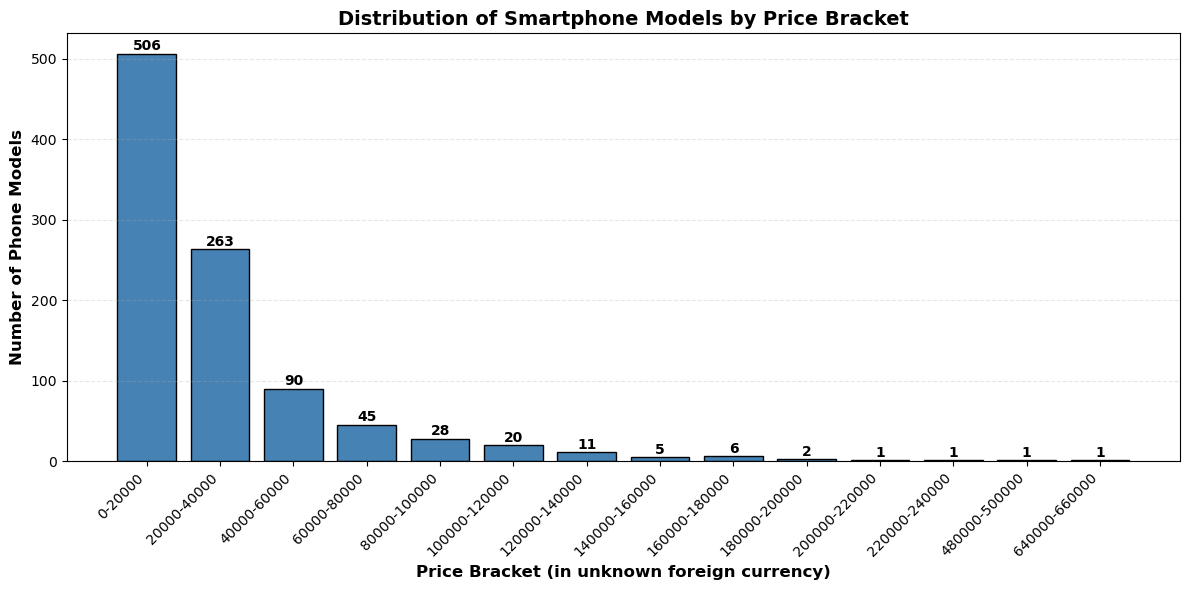


--- Price Bracket Summary ---
0-20000: 506 models
20000-40000: 263 models
40000-60000: 90 models
60000-80000: 45 models
80000-100000: 28 models
100000-120000: 20 models
120000-140000: 11 models
140000-160000: 5 models
160000-180000: 6 models
180000-200000: 2 models
200000-220000: 1 models
220000-240000: 1 models
480000-500000: 1 models
640000-660000: 1 models

Most popular bracket: 0-20000 with 506 models


In [72]:
# Display basic info
print(f"Total number of phones: {len(df)}")
print(f"Price range: {df['price'].min()} to {df['price'].max()}")

# Create price brackets (100-200, 200-300, etc.)
bracket_size = 20000
df['price_bracket'] = (df['price'] // bracket_size) * bracket_size

# Count phones in each bracket
bracket_counts = df['price_bracket'].value_counts().sort_index()

# Create labels like "100-200", "200-300", etc.
labels = [f"{int(bracket)}-{int(bracket + bracket_size)}" for bracket in bracket_counts.index]

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(bracket_counts)), bracket_counts.values, color='steelblue', edgecolor='black')

# Add value labels on top of bars
for i, (bar, value) in enumerate(zip(bars, bracket_counts.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Price Bracket (in unknown foreign currency)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Phone Models', fontsize=12, fontweight='bold')
plt.title('Distribution of Smartphone Models by Price Bracket', fontsize=14, fontweight='bold')
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n--- Price Bracket Summary ---")
for bracket, count in bracket_counts.items():
    print(f"{int(bracket)}-{int(bracket + bracket_size)}: {count} models")
print(f"\nMost popular bracket: {int(bracket_counts.idxmax())}-{int(bracket_counts.idxmax() + bracket_size)} with {bracket_counts.max()} models")



In [73]:
print("From the above bar diagram, we can see that most of the phone models sold are in the lower-budget category. As the budget increases, the number of available models decreases. This trend could be because manufacturers focus on producing a wider range of affordable phones to meet the demands of the mass market, where consumer demand is highest. In contrast, high-end phones target a smaller, niche audience, resulting in fewer models in this segment. Moreover, premium phones often include advanced features and cutting-edge technologies, which are expensive to develop and manufacture, further limiting the number of models available at higher price points.")

From the above bar diagram, we can see that most of the phone models sold are in the lower-budget category. As the budget increases, the number of available models decreases. This trend could be because manufacturers focus on producing a wider range of affordable phones to meet the demands of the mass market, where consumer demand is highest. In contrast, high-end phones target a smaller, niche audience, resulting in fewer models in this segment. Moreover, premium phones often include advanced features and cutting-edge technologies, which are expensive to develop and manufacture, further limiting the number of models available at higher price points.


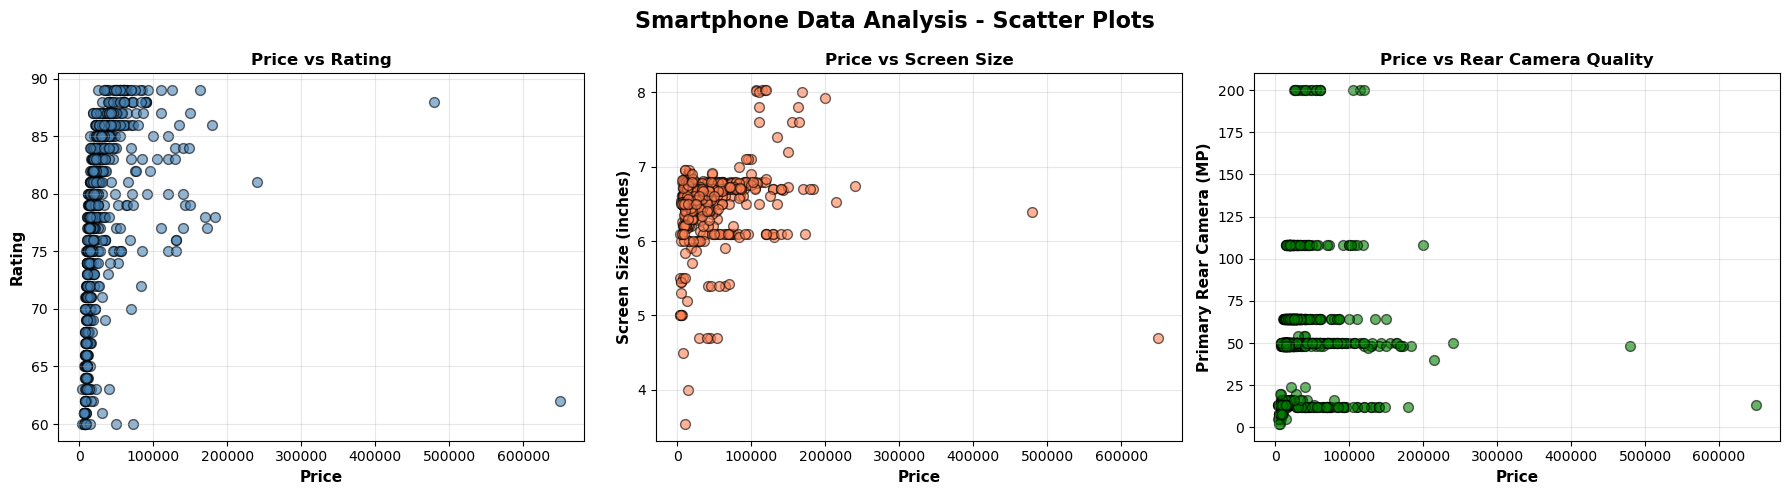

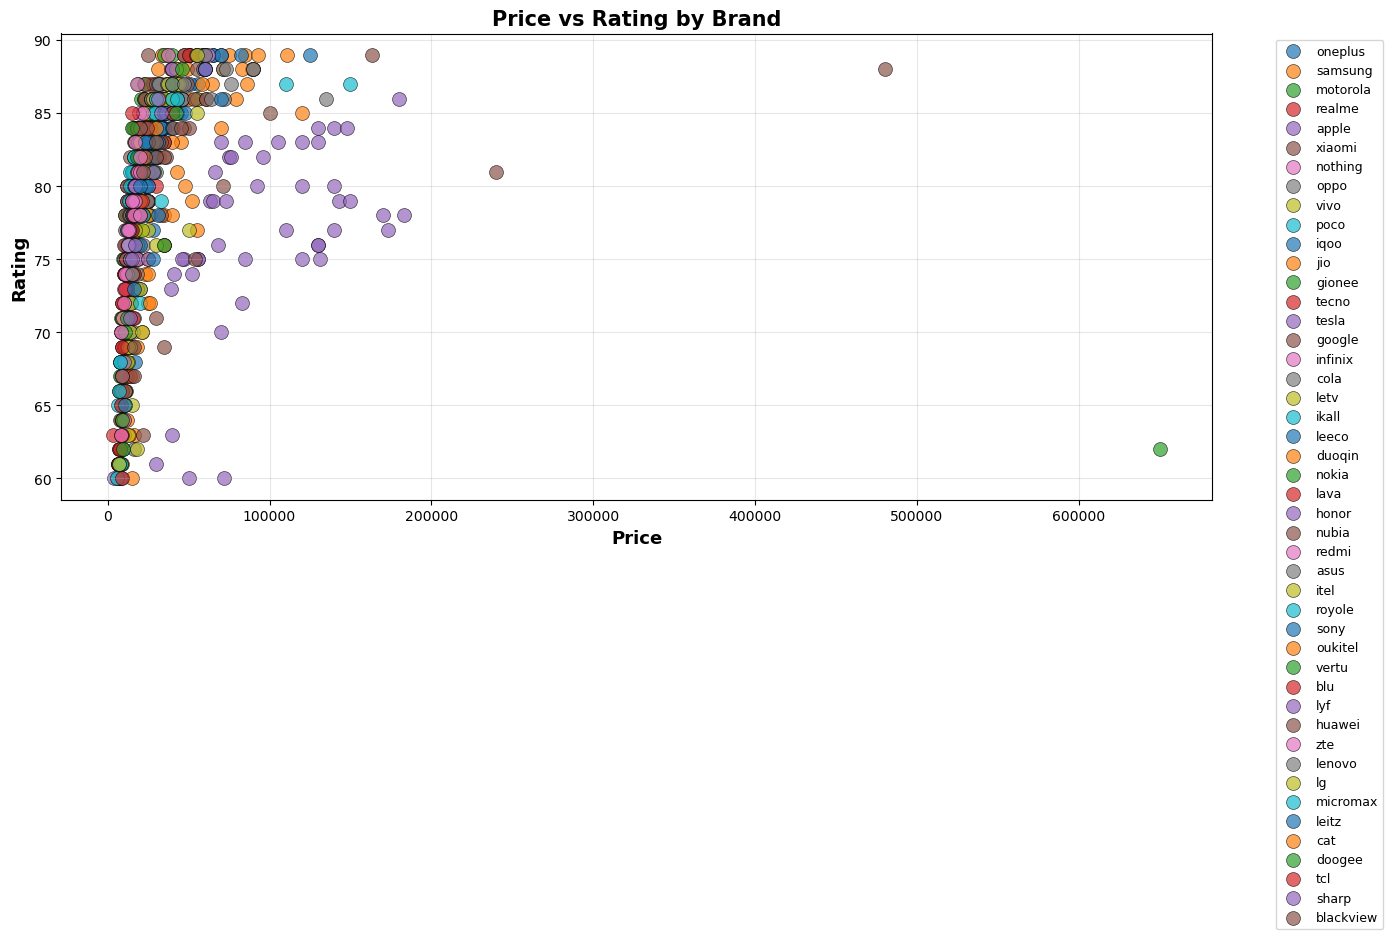

=== Correlation Analysis ===
Price vs Rating correlation: 0.284
Price vs Screen Size correlation: 0.113
Price vs Rear Camera correlation: 0.092
Screen Size vs Rating correlation: 0.298


In [74]:
#figure with multiple scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Smartphone Data Analysis - Scatter Plots', fontsize=16, fontweight='bold')

# 1. Price vs Rating
axes[0].scatter(df['price'], df['rating'], alpha=0.6, c='steelblue', edgecolors='black', s=50)
axes[0].set_xlabel('Price', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Rating', fontsize=11, fontweight='bold')
axes[0].set_title('Price vs Rating', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Price vs Screen Size
axes[1].scatter(df['price'], df['screen_size'], alpha=0.6, c='coral', edgecolors='black', s=50)
axes[1].set_xlabel('Price', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Screen Size (inches)', fontsize=11, fontweight='bold')
axes[1].set_title('Price vs Screen Size', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# 3. Price vs Primary Rear Camera
axes[2].scatter(df['price'], df['primary_camera_rear'], alpha=0.6, c='green', edgecolors='black', s=50)
axes[2].set_xlabel('Price', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Primary Rear Camera (MP)', fontsize=11, fontweight='bold')
axes[2].set_title('Price vs Rear Camera Quality', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional: large scatter plot with color coding by brand
plt.figure(figsize=(14, 8))

# Get unique brands and assign colors
brands = df['brand_name'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(brands)))

for i, brand in enumerate(brands):
    brand_data = df[df['brand_name'] == brand]
    plt.scatter(brand_data['price'], brand_data['rating'], 
                label=brand, alpha=0.7, s=100, edgecolors='black', linewidth=0.5)

plt.xlabel('Price', fontsize=13, fontweight='bold')
plt.ylabel('Rating', fontsize=13, fontweight='bold')
plt.title('Price vs Rating by Brand', fontsize=15, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print correlation analysis
print("=== Correlation Analysis ===")
print(f"Price vs Rating correlation: {df['price'].corr(df['rating']):.3f}")
print(f"Price vs Screen Size correlation: {df['price'].corr(df['screen_size']):.3f}")
print(f"Price vs Rear Camera correlation: {df['price'].corr(df['primary_camera_rear']):.3f}")
print(f"Screen Size vs Rating correlation: {df['screen_size'].corr(df['rating']):.3f}")

In [75]:
print("Based on above plots there is weak corelation between price and rating. As price increases, ratings tend to increase slightly, but not strongly. Expensive phones are somewhat more likely to have higher ratings. In the same way larger screens are associated with slightly higher ratings.")

Based on above plots there is weak corelation between price and rating. As price increases, ratings tend to increase slightly, but not strongly. Expensive phones are somewhat more likely to have higher ratings. In the same way larger screens are associated with slightly higher ratings.


1. HANDLING MISSING VALUES
--------------------------------------------------------------------------------

--- Dataset BEFORE handling missing values ---
Dataset shape: (980, 26)

First 5 rows:
  brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  \
0           False      snapdragon        8.0              3.2   
1           False      snapdragon        8.0              2.2   
2           False          exynos        8.0              2.4   
3           False      snapdragon        8.0              2.2   
4           False       dime

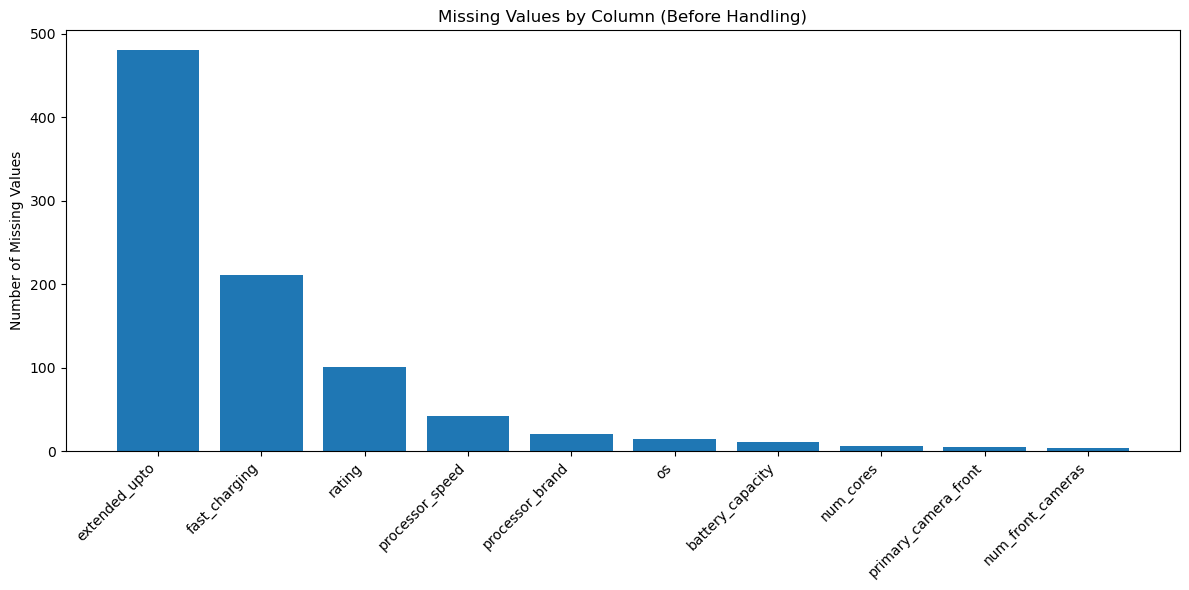


--- Applying Missing Value Handling Strategies ---
  - Filled 'rating' with median: 80.00
  - Filled 'num_cores' with median: 8.00
  - Filled 'processor_speed' with median: 2.30
  - Filled 'battery_capacity' with median: 5000.00
  - Filled 'fast_charging' with median: 33.00
  - Filled 'num_front_cameras' with median: 1.00
  - Filled 'primary_camera_front' with median: 16.00
  - Filled 'extended_upto' with median: 1024.00
  - Filled 'processor_brand' with mode: snapdragon
  - Filled 'os' with mode: android

--- Dataset AFTER handling missing values ---
Dataset shape: (980, 26)

First 5 rows:
  brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realm

/var/folders/vc/7k3rn4t55sz4czhtkzq70g_00000gn/T/ipykernel_26626/2787198715.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(median_value, inplace=True)
/var/folders/vc/7k3rn4t55sz4czhtkzq70g_00000gn/T/ipykernel_26626/2787198715.py:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [76]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


# 1. HANDLING MISSING VALUES
print("1. HANDLING MISSING VALUES")
print("-"*80)

# Display dataset before handling missing values
print("\n--- Dataset BEFORE handling missing values ---")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

# Detect and report missing values
print("\n--- Missing Values Report ---")
missing_counts = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percentage': missing_percentages.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df)

# Visualize missing values
plt.figure(figsize=(12, 6))
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
if len(missing_data) > 0:
    plt.bar(range(len(missing_data)), missing_data.values)
    plt.xticks(range(len(missing_data)), missing_data.index, rotation=45, ha='right')
    plt.ylabel('Number of Missing Values')
    plt.title('Missing Values by Column (Before Handling)')
    plt.tight_layout()
    plt.savefig('missing_values_before.png', dpi=300, bbox_inches='tight')
    plt.show()

# Create a copy for processing
df_processed = df.copy()

# Handle missing values with different strategies
print("\n--- Applying Missing Value Handling Strategies ---")

# Strategy for numerical columns
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df_processed[col].isnull().sum() > 0:
        # Use median for numerical columns (more robust to outliers)
        median_value = df_processed[col].median()
        df_processed[col].fillna(median_value, inplace=True)
        print(f"  - Filled '{col}' with median: {median_value:.2f}")

# Strategy for categorical columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        # Use mode for categorical columns
        mode_value = df_processed[col].mode()[0] if not df_processed[col].mode().empty else 'Unknown'
        df_processed[col].fillna(mode_value, inplace=True)
        print(f"  - Filled '{col}' with mode: {mode_value}")

# Strategy for boolean columns
boolean_cols = df_processed.select_dtypes(include=['bool']).columns
for col in boolean_cols:
    if df_processed[col].isnull().sum() > 0:
        # Use mode for boolean columns
        mode_value = df_processed[col].mode()[0] if not df_processed[col].mode().empty else False
        df_processed[col].fillna(mode_value, inplace=True)
        print(f"  - Filled '{col}' with mode: {mode_value}")

# Display dataset after handling missing values
print("\n--- Dataset AFTER handling missing values ---")
print(f"Dataset shape: {df_processed.shape}")
print("\nFirst 5 rows:")
print(df_processed.head())
print(f"\nTotal missing values remaining: {df_processed.isnull().sum().sum()}")

2. OUTLIER DETECTION AND REMOVAL USING THE (IQR Method)
--------------------------------------------------------------------------------

--- IQR Calculation and Outlier Detection ---

price:
  Q1: 12999.00, Q3: 35491.50, IQR: 22492.50
  Bounds: [-20739.75, 69230.25]
  Outliers detected: 107 (10.92%)

rating:
  Q1: 75.00, Q3: 84.00, IQR: 9.00
  Bounds: [61.50, 97.50]
  Outliers detected: 27 (2.76%)

num_cores:
  Q1: 8.00, Q3: 8.00, IQR: 0.00
  Bounds: [8.00, 8.00]
  Outliers detected: 75 (7.65%)

processor_speed:
  Q1: 2.05, Q3: 2.84, IQR: 0.79
  Bounds: [0.86, 4.03]
  Outliers detected: 0 (0.00%)

screen_size:
  Q1: 6.50, Q3: 6.67, IQR: 0.17
  Bounds: [6.25, 6.92]
  Outliers detected: 113 (11.53%)

refresh_rate:
  Q1: 60.00, Q3: 120.00, IQR: 60.00
  Bounds: [-30.00, 210.00]
  Outliers detected: 1 (0.10%)

num_rear_cameras:
  Q1: 2.00, Q3: 3.00, IQR: 1.00
  Bounds: [0.50, 4.50]
  Outliers detected: 0 (0.00%)

num_front_cameras:
  Q1: 1.00, Q3: 1.00, IQR: 0.00
  Bounds: [1.00, 1.00]
  O

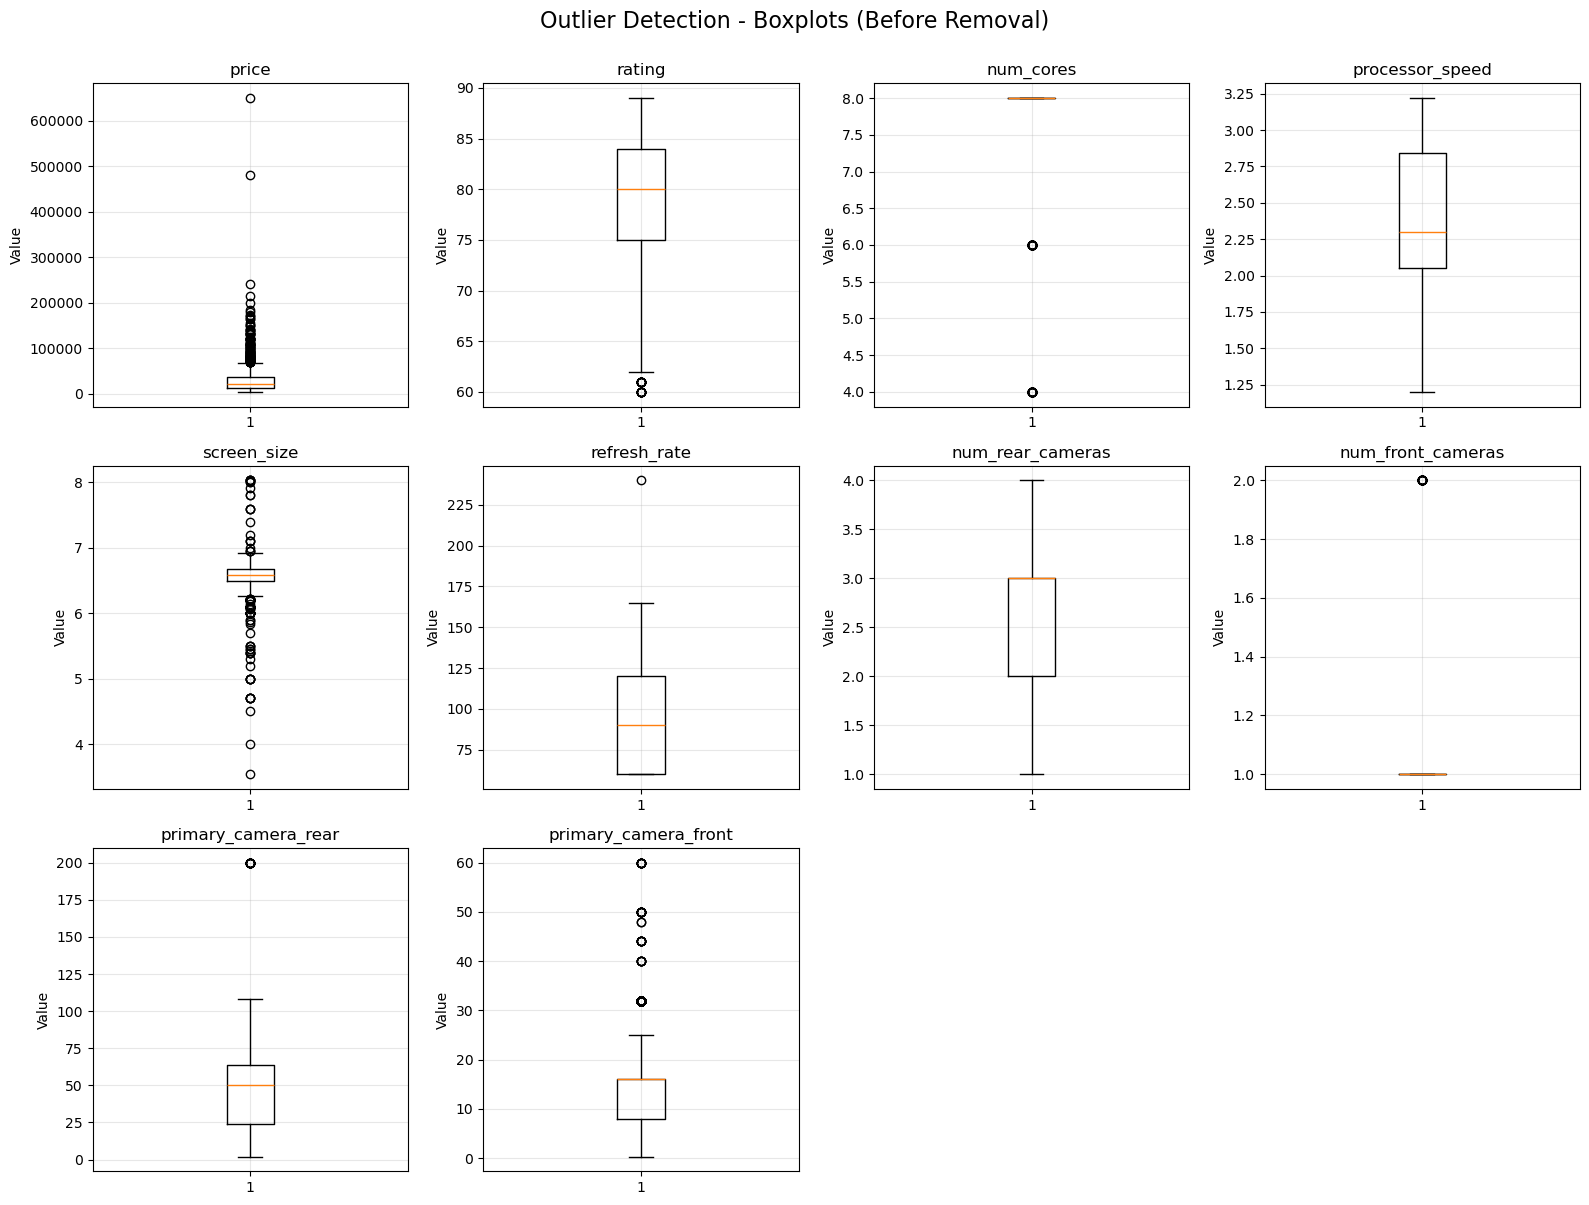


--- Removing Outliers ---
Rows before outlier removal: 980
Rows after outlier removal: 181
Rows removed: 799 (81.53%)

--- Dataset AFTER outlier removal ---
   brand_name                         model  price  rating  has_5g  has_nfc  \
1     oneplus     OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2     samsung         Samsung Galaxy A14 5G  16499    75.0    True    False   
3    motorola          Motorola Moto G62 5G  14999    81.0    True    False   
12     xiaomi   Xiaomi Redmi Note 12 Pro 5G  24762    79.0    True    False   
13       vivo  Vivo T1 5G (6GB RAM + 128GB)  16990    80.0    True    False   

    has_ir_blaster processor_brand  num_cores  processor_speed  \
1            False      snapdragon        8.0              2.2   
2            False          exynos        8.0              2.4   
3            False      snapdragon        8.0              2.2   
12            True       dimensity        8.0              2.6   
13           False      snapdragon   

In [77]:
# 2. OUTLIER DETECTION AND REMOVAL
print("2. OUTLIER DETECTION AND REMOVAL USING THE (IQR Method)")
print("-"*80)

# In This case using numerical columns for outlier detection
numerical_cols_for_outliers = ['price', 'rating', 'num_cores', 'processor_speed', 
                                'screen_size', 'refresh_rate', 'num_rear_cameras', 
                                'num_front_cameras', 'primary_camera_rear', 
                                'primary_camera_front']

# Filter to only existing columns
numerical_cols_for_outliers = [col for col in numerical_cols_for_outliers if col in df_processed.columns]

print("\n--- IQR Calculation and Outlier Detection ---")
outlier_summary = []

for col in numerical_cols_for_outliers:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_processed[(df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)]
    outlier_count = len(outliers)
    
    outlier_summary.append({
        'Column': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': (outlier_count / len(df_processed)) * 100
    })
    
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers detected: {outlier_count} ({(outlier_count/len(df_processed)*100):.2f}%)")

outlier_df = pd.DataFrame(outlier_summary)
print("\n--- Outlier Summary Table ---")
print(outlier_df)

# Visualize outliers using boxplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols_for_outliers):
    if idx < len(axes):
        axes[idx].boxplot(df_processed[col].dropna())
        axes[idx].set_title(f'{col}')
        axes[idx].set_ylabel('Value')
        axes[idx].grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(numerical_cols_for_outliers), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Outlier Detection - Boxplots (Before Removal)', fontsize=16, y=1.00)
plt.tight_layout()
plt.savefig('outliers_before.png', dpi=300, bbox_inches='tight')
plt.show()

# Remove outliers
print("\n--- Removing Outliers ---")
df_no_outliers = df_processed.copy()
rows_before = len(df_no_outliers)

for col in numerical_cols_for_outliers:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_no_outliers = df_no_outliers[
        (df_no_outliers[col] >= lower_bound) & 
        (df_no_outliers[col] <= upper_bound)
    ]

rows_after = len(df_no_outliers)
print(f"Rows before outlier removal: {rows_before}")
print(f"Rows after outlier removal: {rows_after}")
print(f"Rows removed: {rows_before - rows_after} ({((rows_before - rows_after)/rows_before*100):.2f}%)")

print("\n--- Dataset AFTER outlier removal ---")
print(df_no_outliers.head())


In [78]:
# 3. DATA REDUCTION
print("\n" + "="*80)
print("3. DATA REDUCTION")
print("-"*80)

print("\n--- Dataset BEFORE data reduction ---")
print(f"Shape: {df_no_outliers.shape}")
print(f"Columns: {list(df_no_outliers.columns)}")

# A. Sampling - reduce rows
print("\n--- A. Sampling (Row Reduction) ---")
sample_percentage = 0.7  # Keep 70% of data
df_sampled = df_no_outliers.sample(frac=sample_percentage, random_state=42)
print(f"Original rows: {len(df_no_outliers)}")
print(f"After sampling ({sample_percentage*100}%): {len(df_sampled)}")

# B. Dimension elimination - drop less relevant columns
print("\n--- B. Dimension Elimination (Column Reduction) ---")

# Calculate correlation with price (target variable) for numerical columns
numerical_features = df_sampled.select_dtypes(include=[np.number]).columns.tolist()
if 'price' in numerical_features:
    correlations = df_sampled[numerical_features].corr()['price'].abs().sort_values(ascending=False)
    print("\nCorrelation with price:")
    print(correlations)
    
    # Drop columns with very low correlation (< 0.1) to price
    low_corr_cols = correlations[correlations < 0.1].index.tolist()
    low_corr_cols = [col for col in low_corr_cols if col != 'price']
    
    # Also consider dropping columns with high missing values originally
    # or columns that might be redundant
    columns_to_drop = []
    
    # Example: if extended_upto has many missing/NaN, consider dropping
    if 'extended_upto' in df_sampled.columns:
        if df_sampled['extended_upto'].isnull().sum() / len(df_sampled) > 0.5:
            columns_to_drop.append('extended_upto')
    
    # Combine low correlation columns with other candidates
    columns_to_drop.extend(low_corr_cols[:3])  # Drop top 3 low correlation columns
    columns_to_drop = list(set(columns_to_drop))  # Remove duplicates
    
    print(f"\nColumns to drop: {columns_to_drop}")
    
    df_reduced = df_sampled.drop(columns=columns_to_drop, errors='ignore')
else:
    df_reduced = df_sampled

print("\n--- Dataset AFTER data reduction ---")
print(f"Shape: {df_reduced.shape}")
print(f"Columns: {list(df_reduced.columns)}")
print(f"\nReduction summary:")
print(f"  Rows: {len(df_no_outliers)} → {len(df_reduced)} ({((1-len(df_reduced)/len(df_no_outliers))*100):.2f}% reduction)")
print(f"  Columns: {df_no_outliers.shape[1]} → {df_reduced.shape[1]} ({df_no_outliers.shape[1] - df_reduced.shape[1]} columns dropped)")



3. DATA REDUCTION
--------------------------------------------------------------------------------

--- Dataset BEFORE data reduction ---
Shape: (181, 26)
Columns: ['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging_available', 'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'resolution', 'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear', 'primary_camera_front', 'extended_memory_available', 'extended_upto', 'price_bracket']

--- A. Sampling (Row Reduction) ---
Original rows: 181
After sampling (70.0%): 127

--- B. Dimension Elimination (Column Reduction) ---

Correlation with price:
price                        1.000000
price_bracket                0.870049
rating                       0.672817
processor_speed              0.657996
ram_capacity                 0.575013
fast_charging                0.536133
internal_me

In [79]:
# 4. DATA SCALING AND DISCRETIZATION
print("\n" + "-"*80)
print("4. DATA SCALING AND DISCRETIZATION")
print("-"*80)

df_final = df_reduced.copy()

# Select numerical columns for scaling
numerical_cols_to_scale = df_final.select_dtypes(include=[np.number]).columns.tolist()

print("\n--- Dataset BEFORE scaling ---")
print(df_final[numerical_cols_to_scale].head())
print("\nStatistics before scaling:")
print(df_final[numerical_cols_to_scale].describe())

# A. Min-Max Scaling (0-1)
print("\n--- A. Min-Max Scaling (0-1) ---")
scaler_minmax = MinMaxScaler()
df_minmax = df_final.copy()
df_minmax[numerical_cols_to_scale] = scaler_minmax.fit_transform(df_final[numerical_cols_to_scale])
print("Sample after Min-Max scaling:")
print(df_minmax[numerical_cols_to_scale].head())

# B. Z-score Standardization
print("\n--- B. Z-score Standardization ---")
scaler_standard = StandardScaler()
df_standardized = df_final.copy()
df_standardized[numerical_cols_to_scale] = scaler_standard.fit_transform(df_final[numerical_cols_to_scale])
print("Sample after Z-score standardization:")
print(df_standardized[numerical_cols_to_scale].head())

# C. Decimal Scaling
print("\n--- C. Decimal Scaling ---")
df_decimal = df_final.copy()
for col in numerical_cols_to_scale:
    max_abs = df_final[col].abs().max()
    if max_abs > 0:
        j = np.ceil(np.log10(max_abs))
        df_decimal[col] = df_final[col] / (10 ** j)
        print(f"  {col}: divided by 10^{j}")
print("Sample after Decimal scaling:")
print(df_decimal[numerical_cols_to_scale].head())

# D. Discretization
print("\n--- D. Discretization (Binning) ---")
df_discretized = df_final.copy()

# Discretize price into categories
if 'price' in df_discretized.columns:
    df_discretized['price_category'] = pd.cut(
        df_final['price'], 
        bins=[0, 15000, 30000, 50000, np.inf],
        labels=['Budget', 'Mid-Range', 'Premium', 'Flagship']
    )
    print("\nPrice categories:")
    print(df_discretized['price_category'].value_counts().sort_index())

# Discretize rating into categories
if 'rating' in df_discretized.columns:
    df_discretized['rating_category'] = pd.cut(
        df_final['rating'],
        bins=[0, 70, 80, 90, 100],
        labels=['Poor', 'Average', 'Good', 'Excellent']
    )
    print("\nRating categories:")
    print(df_discretized['rating_category'].value_counts().sort_index())

# Discretize screen size
if 'screen_size' in df_discretized.columns:
    df_discretized['screen_category'] = pd.cut(
        df_final['screen_size'],
        bins=[0, 6.0, 6.5, 7.0, np.inf],
        labels=['Compact', 'Standard', 'Large', 'Extra-Large']
    )
    print("\nScreen size categories:")
    print(df_discretized['screen_category'].value_counts().sort_index())

print("\nSample after discretization:")
print(df_discretized[['price', 'price_category', 'rating', 'rating_category']].head(10))


--------------------------------------------------------------------------------
4. DATA SCALING AND DISCRETIZATION
--------------------------------------------------------------------------------

--- Dataset BEFORE scaling ---
     price  rating  num_cores  processor_speed  fast_charging  ram_capacity  \
95   12499    75.0        8.0              2.4           33.0           4.0   
203  12999    79.0        8.0              2.4           33.0           6.0   
805  29990    76.0        8.0              2.3           67.0           8.0   
382  18498    82.0        8.0              2.2           18.0           8.0   
717  14999    80.0        8.0              2.2           30.0           6.0   

     internal_memory  screen_size  refresh_rate  num_rear_cameras  \
95              64.0         6.60            90                 3   
203            128.0         6.60            90                 3   
805            128.0         6.44            90                 3   
382            128.

In [86]:
print("1. GENERAL OVERVIEW OF DATA")
df_clean = df_no_outliers.copy()
print(f"Dataset shape: {df_clean.shape}")
print(f"Analysis date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")

print("-"*80)

print("\n--- .info() OUTPUT ---")
print("\nDataset Information:")
df_clean.info()

print("\n" + "-"*80)
print("\n--- .describe() OUTPUT ---")
print("\nStatistical Summary of Numerical Columns:")
describe_output = df_clean.describe()
print(describe_output)

1. GENERAL OVERVIEW OF DATA
Dataset shape: (181, 26)
Analysis date: 2025-10-30 22:09:11
--------------------------------------------------------------------------------

--- .info() OUTPUT ---

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 1 to 977
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 181 non-null    object 
 1   model                      181 non-null    object 
 2   price                      181 non-null    int64  
 3   rating                     181 non-null    float64
 4   has_5g                     181 non-null    bool   
 5   has_nfc                    181 non-null    bool   
 6   has_ir_blaster             181 non-null    bool   
 7   processor_brand            181 non-null    object 
 8   num_cores                  181 non-null    float64
 9   processor_speed            181 non-null    float64
 10  battery_

In [98]:
print("2. CENTRAL TENDENCY MEASURES")

# Select numerical columns
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

central_tendency_results = []

for col in numerical_cols:
    # Calculate central tendency measures
    min_val = df_clean[col].min()
    max_val = df_clean[col].max()
    mean_val = df_clean[col].mean()
    median_val = df_clean[col].median()
    
    # Mode calculation (can have multiple modes)
    mode_result = df_clean[col].mode()
    mode_val = mode_result.iloc[0] if len(mode_result) > 0 else np.nan
    
    central_tendency_results.append({
        'Column': col,
        'Minimum': min_val,
        'Maximum': max_val,
        'Mean': mean_val,
        'Median': median_val,
        'Mode': mode_val
    })

# Create DataFrame for central tendency
ct_df = pd.DataFrame(central_tendency_results)
ct_df = ct_df.round(4)

print("\n" + "-"*80)
print("\n--- CENTRAL TENDENCY SUMMARY TABLE ---")
print(ct_df.to_string(index=False))





2. CENTRAL TENDENCY MEASURES

--------------------------------------------------------------------------------

--- CENTRAL TENDENCY SUMMARY TABLE ---
                   Column  Minimum  Maximum       Mean  Median    Mode
                    price   9999.0  64449.0 22609.6740 19989.0 14999.0
                   rating     67.0     89.0    80.4862    80.0    80.0
                num_cores      8.0      8.0     8.0000     8.0     8.0
          processor_speed      1.8      3.1     2.4073     2.4     2.2
         battery_capacity   3730.0  21000.0  5011.8674  5000.0  5000.0
  fast_charging_available      0.0      1.0     0.9945     1.0     1.0
            fast_charging     15.0    150.0    44.6575    33.0    33.0
             ram_capacity      4.0     12.0     6.8398     8.0     8.0
          internal_memory     64.0    256.0   131.8895   128.0   128.0
              screen_size      6.4      6.9     6.5910     6.6     6.6
             refresh_rate     60.0    144.0   101.3702   120.0   120

In [102]:
print("3. DISPERSION MEASURES")
dispersion_results = []

for col in numerical_cols:
    # Calculate dispersion measures
    range_val = df_clean[col].max() - df_clean[col].min()
    q1 = df_clean[col].quantile(0.25)
    q2 = df_clean[col].quantile(0.50)  # Median
    q3 = df_clean[col].quantile(0.75)
    iqr = q3 - q1
    variance = df_clean[col].var()
    std_dev = df_clean[col].std()
    
    dispersion_results.append({
        'Column': col,
        'Range': range_val,
        'Q1 (25%)': q1,
        'Q2 (50%)': q2,
        'Q3 (75%)': q3,
        'IQR': iqr,
        'Variance': variance,
        'Std_Dev': std_dev
    })
    
    print(f"\n{col}:")
    print(f"  Range:              {range_val:.4f}")
    print(f"  Q1 (25th percentile): {q1:.4f}")
    print(f"  Q2 (50th percentile): {q2:.4f}")
    print(f"  Q3 (75th percentile): {q3:.4f}")
    print(f"  IQR (Q3 - Q1):       {iqr:.4f}")
    print(f"  Variance:            {variance:.4f}")
    print(f"  Standard Deviation:  {std_dev:.4f}")

# Create DataFrame for dispersion measures
disp_df = pd.DataFrame(dispersion_results)
disp_df = disp_df.round(4)

print("\n" + "-"*80)
print("\n--- DISPERSION MEASURES SUMMARY TABLE ---")
print(disp_df.to_string(index=False))


3. DISPERSION MEASURES

price:
  Range:              54450.0000
  Q1 (25th percentile): 15499.0000
  Q2 (50th percentile): 19989.0000
  Q3 (75th percentile): 25895.0000
  IQR (Q3 - Q1):       10396.0000
  Variance:            113461877.7098
  Standard Deviation:  10651.8486

rating:
  Range:              22.0000
  Q1 (25th percentile): 78.0000
  Q2 (50th percentile): 80.0000
  Q3 (75th percentile): 83.0000
  IQR (Q3 - Q1):       5.0000
  Variance:            13.1623
  Standard Deviation:  3.6280

num_cores:
  Range:              0.0000
  Q1 (25th percentile): 8.0000
  Q2 (50th percentile): 8.0000
  Q3 (75th percentile): 8.0000
  IQR (Q3 - Q1):       0.0000
  Variance:            0.0000
  Standard Deviation:  0.0000

processor_speed:
  Range:              1.3000
  Q1 (25th percentile): 2.2000
  Q2 (50th percentile): 2.4000
  Q3 (75th percentile): 2.6000
  IQR (Q3 - Q1):       0.4000
  Variance:            0.1013
  Standard Deviation:  0.3182

battery_capacity:
  Range:              1727

In [105]:

print("4. CORRELATION ANALYSIS")
print("="*80)

# Calculate correlation matrix
correlation_matrix = df_clean[numerical_cols].corr()

print("\n--- CORRELATION MATRIX ---")
print(correlation_matrix.round(4))

# Find strong correlations (excluding diagonal)
print("\n--- STRONG CORRELATIONS (|r| > 0.7) ---")
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            strong_corr.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlation': corr_value,
                'Strength': 'Strong Positive' if corr_value > 0 else 'Strong Negative'
            })

if strong_corr:
    strong_corr_df = pd.DataFrame(strong_corr).sort_values('Correlation', 
                                                           key=abs, 
                                                           ascending=False)
    print(strong_corr_df.to_string(index=False))
else:
    print("No strong correlations found (|r| > 0.7)")



4. CORRELATION ANALYSIS

--- CORRELATION MATRIX ---
                            price  rating  num_cores  processor_speed  \
price                      1.0000  0.7108        NaN           0.6924   
rating                     0.7108  1.0000        NaN           0.5545   
num_cores                     NaN     NaN        NaN              NaN   
processor_speed            0.6924  0.5545        NaN           1.0000   
battery_capacity          -0.0339  0.0236        NaN          -0.1171   
fast_charging_available    0.0674  0.0718        NaN           0.0487   
fast_charging              0.4537  0.4060        NaN           0.6102   
ram_capacity               0.5683  0.7225        NaN           0.3977   
internal_memory            0.3829  0.5375        NaN           0.2188   
screen_size                0.2599  0.1521        NaN           0.2386   
refresh_rate               0.2684  0.3506        NaN           0.4449   
num_rear_cameras              NaN     NaN        NaN              NaN   